In [ ]:
item_menu = "arroz"

print (f"O cardápio hoje é {item_menu}")


In [ ]:
item = "arroz"
age = 15
actual_age = 15.5

type(age)

In [ ]:
club = input("type the club's name: ")
coach = input("type the coach's name")
city = input("type the city's name")

print(f"the {club} has {coach} as its coach and it is  located at the city of {city}")

In [ ]:
list = ['KDB', 'EHL', 'BSL']
list.append('FOLD')
list

In [ ]:
del(list)

In [ ]:
tupla = (1, 2, 3, 4, 5)
lista = list(tupla)
serie = list(range(200, 5000))

In [ ]:
phrase = "the manchester city club has been scouting new players around the globe, especially in south america region given the recent good players who came up from that"

In [ ]:
list_phrase = phrase.split(sep=' ')
print(list_phrase)

In [ ]:
clubs: list[str] = ['Manchester CIty', 'Liverpool', 'Barcelona', 'Chelsea', 'Arsenal', 'New Castle']
clubs_copy: list[str] = clubs.copy()
brazilian_clubs: list[str] = ['Flamengo', 'Grêmio', 'Palmeiras', 'Cruzeiro']

clubs.extend(brazilian_clubs)
print(clubs)

In [ ]:
other_clubs: list[str] = ['Bayern', 'Juventus', 'Real Madrid', 'São Paulo', 'Vitória', 'Santos']

clubs.extend(other_clubs)
print(clubs)



In [ ]:
upper_club = []
for club in clubs:
    club = club.upper()
    upper_club.append(club)
print(upper_club)


In [ ]:
upper_club = [club.upper() for club in clubs ]
print(upper_club)

In [ ]:
new_clubbs = ''.join([i if i.islower() else " " + i for i in clubs])[1:]
print(new_clubbs)

In [ ]:
clubs.reverse()


In [ ]:
club_dict = {
    'Arsenal': 'Havertz',
    'City': 'Debruine',
    'Chelsea': 'Thiago Silva',
    'Manchester U': 'Antony',
    'Barcelona': 'Pedri',
    'New Castle': 'Paqueta',
    'Real Madrid': 'Vini Junior',
    'Bayers': 'Kane',
    'Borusia': 'Reus',
    'PSG': 'Mbappe'
    }


In [ ]:
print(club_dict)

In [ ]:
club_dict = {key+' Footbal Club':value+' Player' for (key, value) in club_dict.items()}
print(club_dict)

In [ ]:
club_dict = {key:(value if value != 'Havertz Player' else 'Kai Havertz') for(key, value) in club_dict.items()}


In [ ]:
clubs = list(club_dict.keys())
players = list(club_dict.values())

In [ ]:
import random

In [ ]:

clubs_list = random.choices(clubs, k = 50)
pairs_clubs_players = [(club_dict[club], club) for club in clubs_list]
pairs_clubs_players

In [ ]:
club_dict['Arsenal']

In [ ]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
page = requests.get(url)

In [ ]:
page.status_code

In [ ]:
source = BeautifulSoup(page.content)

In [ ]:
books = source.select('h3 > a')


In [ ]:
list_book = []
for i in books:
    print('buscando livro {}'.format(i.attrs['href']))
    book = {}
    book_page = requests.get(f'https://books.toscrape.com/catalogue/{i.attrs["href"]}')
    source_page = BeautifulSoup(book_page.content)
    
    book['title'] = source_page.find('h1').text
    book['price'] = source_page.find('p', attrs={'class':'price_color'}).text
    book['stock'] = source_page.find('p', attrs={'class':'instock'}).text.split('(')[1].split(' ')[0]
    book['stars'] = source_page.find('p', attrs={'class': 'star-rating'}).attrs['class'][1]
    book['description'] = list(source_page.select('article > p'))[0].text.strip()
    book.update(dict(zip(list(map(lambda x: x.text, source_page.find_all('th'))), list(map(lambda x: x.text, source_page.find_all('td'))))))
    
    list_book.append(book)
    #print(book)
    
    print()
    
    

In [ ]:
import pandas as pd
pd.DataFrame(list_book)

In [ ]:
list_book = []
pg = 0
while True:
    pg += 1
    page = requests.get(f'https://books.toscrape.com/catalogue/page-{pg}.html')
    source_page = BeautifulSoup(book_page.content) 
    books = source.select('h3 > a')
    
    
    for i in books:
        print('PG: {} | buscando livro {}'.format(pg, i.attrs['href']))
        book = {}
        book_page = requests.get('https://books.toscrape.com/catalogue/'+i.attrs['href'])
        source_page = BeautifulSoup(book_page.content)
        
        book['title'] = source_page.find('h1').text
        book['price'] = source_page.find('p', attrs={'class':'price_color'}).text
        book['stock'] = source_page.find('p', attrs={'class':'instock'}).text.split('(')[1].split(' ')[0]
        book['stars'] = source_page.find('p', attrs={'class': 'star-rating'}).attrs['class'][1]
        desc = source_page.select('article > p')

        if desc:
            book['description'] = desc[0].text.strip()
        book.update(dict(zip(list(map(lambda x: x.text, source_page.find_all('th'))), list(map(lambda x: x.text, source_page.find_all('td'))))))
        
        list_book.append(book)

    if not source.find('a', string='next'):
        break

In [ ]:
import requests

url = "https://www.dafiti.com.br/calcados-masculinos/tenis/"

payload = {}
headers = {
  'authority': 'www.dafiti.com.br',
  'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
  'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
  'cache-control': 'max-age=0',
  'cookie': 'dftab-boletopdf=1; abTestSimilar=variante A; _dy_c_exps=; _dy_c_att_exps=; abProductCampaigns=1; dftab-debit3ds=1; _dycnst=dg; _dyid=-2580562335678812526; _dycst=dk.w.c.ws.; _gcl_au=1.1.1884286422.1701208755; Zanpid=; _tt_enable_cookie=1; _ttp=IDwqc9UaC3ExsTSNNckpj3EHU6Y; _pin_unauth=dWlkPU1qQmlOMlpqTTJVdE1qUXdPQzAwWkRsa0xUZzNZMkl0WlRkbFltSTBOalk1TTJZdw; cookieconsent_status=dismiss; _gcl_aw=GCL.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _gac_UA-86950572-1=1.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _gac_UA-20348534-21=1.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _hjSessionUser_1196013=eyJpZCI6IjczZWJlMWMyLTU4NzQtNTk0ZC1hZjEzLTk5Mjg5OTQ1NGUwOSIsImNyZWF0ZWQiOjE3MDEyMDg3NTU3NzgsImV4aXN0aW5nIjp0cnVlfQ==; _gac_UA-20348534-2=1.1701256731.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; DFTSID=e1dd5e882c8939bdb8641ab929731196; YII_CSRF_TOKEN=23a22c0553a5e704bf0b081d3d2418a0b057d9bc; ADS_UUID_FINGERPRINT=mRPGcaxDOJ01OyVWa%2Fej8UXE1wDHCE0ghpVpXCXAHEhLkYrMAVbukHTZPNe9F3cARH8b36zpJMFRenHhH3HjmYSsAs75pTh6811wpBFNy8JTrk1F9WMdM6K4gKtjxtohdeXrAB4hGFfOUnPaUG5uJzNYgwOWWLJoBKQEy0343iw%3D; _dy_csc_ses=t; x-config=false; showInterestFreeLabel=true; disable-boleto=false; __hl=6570686240c8a8335037daf4; utm_source=awin; utm_medium=af; utm_campaign=1437558; _gid=GA1.3.1015799447.1704547123; _dyjsession=6f9d70647c803a3d65a366856234dcc6; _dy_geo=BR.SA.BR_PA.BR_PA_Santar%C3%A9m; _dy_df_geo=Brazil..Santar%C3%A9m; _hjShownFeedbackMessage=true; dftab-boletopdf=1; seal_refresh=false; _fitAnalyticsABTestFunnel=fitanalytics_false; close-floater-baixe-app=1; tracking-data=; AwinChannelCookie=aw; _hjHasCachedUserAttributes=true; catalog-category-filter=%255B%255D; cart_count=0; cart_total=0; search=%5B%5D; _aw_j_17697={"id":"19abde54-d087-4aee-a375-37796a2d50b5-1","expiration":1712431816}; id-product=AD970SCM03VGI; _ga_B0521B3853=GS1.1.1704547162.4.1.1704548601.0.0.0; dy_fs_page=www.dafiti.com.br%2Ftenis-adidas-performance-pureboost-23-branco-13389734.html; _hjIncludedInSessionSample_1196013=0; _hjSession_1196013=eyJpZCI6IjExNTU1ODlhLWMxOGEtNDQxYy1hYmU5LTYzZmFiY2Q3MWRkNyIsImMiOjE3MDQ1NTE3MzcyOTksInMiOjAsInIiOjAsInNiIjowfQ==; _hjAbsoluteSessionInProgress=0; vip=yes; hostDomain=secure.dafiti.com.br; last-viewed=%5B%22AD970SCM65VHU%22%2C%22AD970SCM03VGI%22%2C%22AS296SCM99TIE%22%2C%22AS296SCM85TQK%22%5D; _dy_ses_load_seq=99395%3A1704551744894; _dy_soct=456415.821753.1696378515*365712.607483.1704547119*829988.1628234.1704547119*337486.546172.1704551744*394538.671875.1704551744*398246.681150.1704551744*834177.1644413.1704551744*856832.1733472.1704551744*860195.1744574.1704551744*114287.157919.1704551744*237122.354091.1704551744; mbox=check#true#1704551806|session#1704551736524-142957#1704553606; _dy_lu_ses=6f9d70647c803a3d65a366856234dcc6%3A1704551745508; _dy_toffset=0; _aw_m_17697=17697_1704547110_cfb3c6c0d94310ea512fb03fe33ab4c5; _derived_epik=dj0yJnU9VU9ZT0JkRFFObGhXWEZmc0RZck8tM0ZWMklnRl9xMW8mbj1VSTRxVjZPTWFHcDEwaE1vT09rNkhnJm09MSZ0PUFBQUFBR1daWlVFJnJtPTEmcnQ9QUFBQUFHV1paVUUmc3A9NQ; cto_bundle=PW9lSl82eXNGcFJSQXlnMXlIUUxWSWhnamlVV1huY3pRdVp0c0YlMkJma2F2NyUyQlNLSXdHdU5WWXNkNjZteGp2UE44Rm14OGJ5UGg5diUyRnhuQWJFSVJUTnNZR1BlSDhJbnhROVRDbnpPdzZ0czdDWk1namMlMkZ6TE1qMjlVRFpVRVVHVSUyRk4lMkIxTTFLTFAlMkZUM25Xc2lEaEsyQ1dYY1clMkZKRUlVRnVMZm8ybjF5a1RxbE1JaUNZM01yOTg4V0QzdnhuTFpjSEdBZHkzVEJNQnZiU2V5UlZCclVQeGlTZjAlMkJ3JTNEJTNE; _ga_6173967VRP=GS1.3.1704551737.6.1.1704551745.0.0.0; _uetsid=1e0c4fe0ac9611ee84b6ab80a20bfe6f; _uetvid=743502d024c611ee9f6e0355c6dee5c0; BackToShop__dafiti_com_br=https%3A%2F%2Fwww.dafiti.com.br%2Fcalcados-masculinos%2Ftenis%2F; _ga=GA1.3.256339213.1701208756; _ga_4X2HC5Z756=GS1.1.1704551738.6.1.1704551754.44.0.0',
  'referer': 'https://www.dafiti.com.br/Tenis-Adidas-Performance-Pureboost-23-Branco-13389734.html',
  'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'document',
  'sec-fetch-mode': 'navigate',
  'sec-fetch-site': 'same-origin',
  'sec-fetch-user': '?1',
  'upgrade-insecure-requests': '1',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


In [2]:
from bs4 import BeautifulSoup

In [3]:
soup = BeautifulSoup(response.content)

In [27]:

tenis = {}
tenis ['model'] = soup.find('p', attrs={'class':'product-box-title'})
tenis ['origin_price'] = soup.find('span', attrs={'class': 'product-box-price-from'})
tenis ['actuall_price'] = soup.find('span', attrs={'class': 'product-box-price-to'})
tenis ['brand'] = soup.select('div.product-box-brand > span')[0].text



In [28]:
tenis

{'model': <p class="product-box-title">Tênis Vans Doheny Marrom</p>,
 'origin_price': <span class="product-box-price-from">R$ 349,99</span>,
 'actuall_price': <span class="product-box-price-to">R$ 249,99</span>,
 'brand': 'Vans'}

In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
with webdriver.Firefox() as driver:
    driver.get("https://mozilla.org")
profile = Options()
options = Options()
options.add_argument('-headless')
profile.set_preference('browser.download.folderlist', 2)
profile.set_preference('browser.download.dir', r'C:\Users\estev\OneDrive\Desktop\DISCIPLINA PYTHON GUSTAVO\SCRIPTS AULAS\PROJETOS-ESTEVAO')
profile.set_preference('general.useragent.override', 'Mozilla/5.0 (Linux; U; Android 4.0.3; en-us; KFTT Build/IML74K) AppleWebKit/537.36 (KHTML, like Gecko) Silk/3.68 like Chrome/39.0.2171.93 Safari/537.36')


In [9]:
driver = webdriver.Firefox(options=profile)
import time 

In [2]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [10]:
driver.get('https://www.amazon.com.br/')

In [3]:
def find_element(driver, xpath):
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, xpath))
    )
    return element

In [ ]:
from selenium.common.exceptions import TimeoutException

def find_element(driver, xpath):
    try:
        # Esperar por até 20 segundos até que o elemento seja visível
        element = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, xpath))
        )
        return element
    except TimeoutException as te:
        print(f'Tempo limite excedido ao tentar encontrar o elemento: {xpath}')
        raise te

# Usar a função find_element com WebDriverWait
search_input = find_element(driver, '/html/body/div[1]/div[1]/div[2]/div[2]/div/div[1]/div/div/div[2]/div/ul/li[2]/span/a/img')


In [44]:
from selenium.webdriver.support.expected_conditions import presence_of_element_located
with webdriver.Firefox() as driver:

    driver.get("https://www.amazon.com.br/")
    wait = WebDriverWait(driver, 10)
    driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div").send_keys("livros" + Keys.RETURN)
with open('img.png', 'r'):
    img.write(driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div"))



In [ ]:
with webdriver.Firefox() as driver:

    driver.get("https://www.amazon.com.br/")
    wait = WebDriverWait(driver, 10)
    driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div").send_keys("amor" + Keys.RETURN)
    wait.until(presence_of_element_located((By.XPATH, '/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[2]/div/div/div/div/span/div/div/div[1]')))
    with open('img.png', 'wb') as img:
        img.write(driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[2]/div/div/div/div/span/div/div/div[1]").screenshot_as_png)

In [58]:
with webdriver.Firefox() as driver:
    driver.get("https://www.amazon.com.br/")
    
    
    search_input = driver.find_element(By.XPATH, "//*[@id='twotabsearchtextbox']")
    wait = WebDriverWait(driver, 10)
    search_input.send_keys("livros" + Keys.RETURN)


    wait = WebDriverWait(driver, 10)
    wait.until(presence_of_element_located((By.XPATH, '/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[3]/div/div/div/div/span/div/div/div[1]')))
    
   
    target_element = driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[3]/div/div/div/div/span/div/div/div[1]")
    
 
    screenshot = target_element.screenshot_as_png
    with open('img.png', 'wb') as img:
        img.write(screenshot)


In [31]:
from selenium.common.exceptions import TimeoutException
def find_elements(driver, xpath):
    elements = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, xpath))
    )
    return elements

search_input = find_elements(driver, "//*[@id='twotabsearchtextbox']")
for element in search_input:
    search_input[0].clear()
    search_input[0].send_keys('livros')
    search_input[0].send_keys(Keys.ENTER) 

In [32]:
book_list = list(map(lambda x: x.get_attribute('href'), find_elements(driver, '//div[@class="a-section a-spacing-base"]/div[1]/span/a[@class="a-link-normal s-no-outline"]')))


In [34]:
def wait_element_load(driver, xpath, time):
    try:
        element = WebDriverWait(driver, time).until(
            EC.presence_of_all_elements_located(By.XPATH,xpath)
        )
    except:
        print("element didn't load")

In [35]:
home = driver.current_window_handle
new_tab = driver.window_handles[1]
driver.current_url
driver.switch_to.window(new_tab)

In [ ]:
all_books = []
pg = 0

while True:
    pg +=1
    driver.switch_to.window(home)
    time.sleep(1)

    book_list = list(map(lambda x: x.get_attribute('href'), find_elements(driver, '//div[@class="a-section a-spacing-base"]/div[1]/span/a[@class="a-link-normal s-no-outline"]')))
    find_elements("//a[@class = 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")
    driver.switch_to.window(new_tab)
    book_c = 0
    for i in book_list:
        book_c += 1
        actual_book = {}
        driver.get(i)
        wait_element_load(driver, "//h1[@id = 'title']", 3)
        actual_book['book_title'] = find_elements(driver, "//h1[@id = 'title']").text
        break

        



In [40]:
find_elements(driver, "//a[@class = 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")

TimeoutException: Message: 


In [29]:
import basedosdados as bd


In [ ]:
query = '''
SELECT sigla_uf * 
FROM basedosdados.br_anp_precos_combustiveis.microdados 
WHERE sigla_uf = 'PA'
'''
df = bd.read_sql(query,
billing_project_id="estevaomcsproject")

In [1]:
def nums (num):

    print (num)
    if num % 2 != 0:
        print('please enter an even number')

    elif num == 2:
        return num
    else:
        return nums(num-2)

In [19]:
def Fibonacci(idx):
    if idx <= 1:
        return idx
    else:
        return Fibonacci(idx-1)+Fibonacci(idx-2)


In [21]:
def fibonacci (idx):
    seq = [0, 1]
    for i in range(idx):
        seq.append(seq[-1]+seq[-2])
    return seq[-2]
    



In [27]:
import pandas as pd

In [36]:
Clubs = {'Clubs': ['BArcelona',  'Real Madrid', 'Bayern', 'Manchenster CIty', 'Liverpool'],
         'Players': ['Pedri', 'Vini Junior', 'Kimichi', 'Rodri', 'Salah'],
         'Trophies':[5, 6, 7, 9, 0]}

 


pd.DataFrame(Clubs)

,Clubs,Players,Trophies
0,BArcelona,Pedri,5
1,Real Madrid,Vini Junior,6
2,Bayern,Kimichi,7
3,Manchenster CIty,Rodri,9
4,Liverpool,Salah,0


In [50]:
a = [1, 2, 3, 4, 5]
b = ['Pimeiro', 'Segundo', 'Terceiro', 'Quarto', 'Quinto']
c = ['FIrst', 'Second', 'Third', 'Fourth', 'Fifth']

pos = list(zip(a, b, c))



In [51]:
pos

[(1, 'Pimeiro', 'FIrst'),
 (2, 'Segundo', 'Second'),
 (3, 'Terceiro', 'Third'),
 (4, 'Quarto', 'Fourth'),
 (5, 'Quinto', 'Fifth')]

In [4]:
clubs = [
    {'clubs': 'Real Madrid', 'trophies': 10, 'stadium_grass': ['fake', 'real'], 'locate': 'Spain'},
    {'clubs': 'Barcelona', 'trophies': 9, 'stadium_grass': ['real'], 'locate':'Spain'},
    {'clubs': 'Bayern Munich', 'trophies': 10, 'stadium_grass': ['fake'], 'locate':'Germany'},
    {'clubs': 'Manchester United', 'trophies': 20, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Liverpool', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Chelsea', 'trophies': 3, 'stadium_grass': ['fake'], 'locate':'England'},
    {'clubs': 'Manchester City', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Arsenal', 'trophies': 39, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Tottenham Hotspur', 'trophies': 90, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Juventus', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atlético Madrid', 'trophies': 34, 'stadium_grass': ['fake'], 'locate':'Spain'},
    {'clubs': 'Inter Milan', 'trophies': 19, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Roma', 'trophies': 22, 'stadium_grass': ['fake'], 'locate':'Italy'},
    {'clubs': 'Napoli', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'AC Milan', 'trophies': 69, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Lazio', 'trophies': 18, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Fiorentina', 'trophies': 30, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atalanta', 'trophies': 3, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'Bayer Leverkusen', 'trophies': 10, 'stadium_grass': ['real'], 'locate':'Germany'},
    {'clubs': 'Borussia Dortmund', 'trophies': 29, 'stadium_grass': ['fake', 'real'], 'locate':'Germany'}
]



In [99]:
clubs_filter = list(map(lambda c: c['clubs'], filter(lambda c: c['locate'] == 'England', clubs)))
clubs_filter

['Manchester United',
 'Liverpool',
 'Chelsea',
 'Manchester City',
 'Arsenal',
 'Tottenham Hotspur']

In [ ]:
for index, club in enumerate(clubs):
    print(index, club['clubs'])

In [57]:
class olx:
    def __init__(self):
        pass
    def golaço(self, gol):
        if gol >= 20:
            print('golaço do caralho')
        else:
            print('gol normal')
        
    def player(self, n_gols):

        if n_gols <= 10:
            print('nada demais, só obrigação')
        else:
            print(f'artilheiro foda p krl marcou {n_gols} gols')

In [58]:
var = olx()


In [70]:
from multiprocessing.pool import ThreadPool as Pool
import multiprocessing
import threading

In [1]:
import multiprocessing
from multiprocessing import Process, Queue

class Players(process


[None, None]

In [ ]:
num_robot = 4
pool = Pool(num_robot)
threads = []

for i in range(1,40):
    threads.append(pool.apply_async(multi, (i,)))
for result in threads:
    result.get()
pool.close()

In [88]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [1]:
from threading import Thread
from os import getpid, getppid

def 

In [31]:
class PLAYER:
    def __init__(self):
        self.all_players = []

    
    def add_player (self, name, goals):
        player = {'Player': name, 'Number of goals': goals}
        self.all_players.append(player) 

    def info_players (self, name):
            found_player = next((player for player in self.all_players if player['Player']==name), None)
            
            if found_player:
                goals = found_player['Number of goals']
                 
                if 0 <= goals <10 :
                    print (f"{name}, is a very fucked up player, he didn't score one sigle goal in Premier League")
                
                elif 10< goals <= 1000:
                    print(f"{name} is a average player in Premier League")
            else:
                print(f'The player {name} is not on hte list')
    
    def show_players (self):
        
        return self.all_players



        
        

In [33]:
team = PLAYER()
#team.add_player('Ronaldo', 50 )
team.add_player('Messi', 4)



In [35]:
team.show_players()

[{'Player': 'Messi', 'Number of goals': 4}]

In [6]:
from multiprocessing import Process, Queue, Pool

def f(x):
    return x*x


if __name__=='__main__':
    with Pool(processes=2) as pool:
        print(pool.map(f, range(3)))
    

In [18]:
clubs = [
    {'clubs': 'Real Madrid', 'trophies': 10, 'stadium_grass': ['fake', 'real'], 'locate': 'Spain'},
    {'clubs': 'Barcelona', 'trophies': 9, 'stadium_grass': ['real'], 'locate':'Spain'},
    {'clubs': 'Bayern Munich', 'trophies': 10, 'stadium_grass': ['fake'], 'locate':'Germany'},
    {'clubs': 'Manchester United', 'trophies': 20, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Liverpool', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Chelsea', 'trophies': 3, 'stadium_grass': ['fake'], 'locate':'England'},
    {'clubs': 'Manchester City', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Arsenal', 'trophies': 39, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Tottenham Hotspur', 'trophies': 90, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Juventus', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atlético Madrid', 'trophies': 34, 'stadium_grass': ['fake'], 'locate':'Spain'},
    {'clubs': 'Inter Milan', 'trophies': 19, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Roma', 'trophies': 22, 'stadium_grass': ['fake'], 'locate':'Italy'},
    {'clubs': 'Napoli', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'AC Milan', 'trophies': 69, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Lazio', 'trophies': 18, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Fiorentina', 'trophies': 30, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atalanta', 'trophies': 3, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'Bayer Leverkusen', 'trophies': 10, 'stadium_grass': ['real'], 'locate':'Germany'},
    {'clubs': 'Borussia Dortmund', 'trophies': 29, 'stadium_grass': ['fake', 'real'], 'locate':'Germany'}
]



In [69]:
clube = {'clubs': 'Grêmio', 'trophies':30, 'stadium_grass':['real'], 'locate':'Brazil'}
clubs.append(clube)


list[slice('clubs', 'Grêmio', None), slice('trophies', 30, None), slice('stadium_grass', ['real'], None), slice('locate', 'Brazil', None)]

In [101]:
df = pd.DataFrame(clubs)
df = df.drop(df.index[20:])

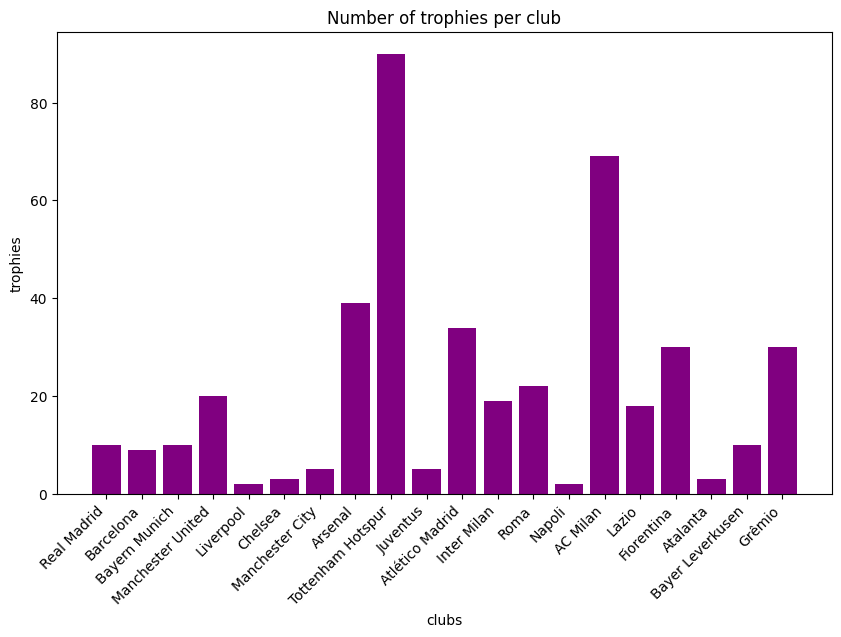

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['clubs'], df['trophies'], color='purple')
plt.xlabel('clubs')
plt.ylabel('trophies')
plt.title('Number of trophies per club')
plt.xticks(rotation=45, ha='right')
plt.show()